In [1]:
from superfv import AdvectionSolver, initial_conditions
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
from itertools import product
import pandas as pd

In [2]:
def l1(x):
    return np.mean(np.abs(x))

In [3]:
data = []
for N, p in product([16, 32, 64], [0, 1, 2, 3]):
    solver = AdvectionSolver(
        ic=partial(initial_conditions.sinus, vx=2, vy=1),
        nx=N,
        ny=N,
        p=p,
        interpolation_scheme="gauss-legendre",
    )
    solver.run(1)
    _slc = solver.array_slicer
    data.append(
        {
            "N": N,
            "p": p,
            "l1": l1(
                solver.snapshots(1.0)["u"][_slc("rho")]
                - solver.snapshots(0.0)["u"][_slc("rho")]
            ),
        }
    )
df = pd.DataFrame(data)

100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:01]                 
100%|██████████| 1.0/1 [00:02]                 
100%|██████████| 1.0/1 [00:00]                 
100%|██████████| 1.0/1 [00:02]                 
100%|██████████| 1.0/1 [00:04]                 
100%|██████████| 1.0/1 [00:08]                 


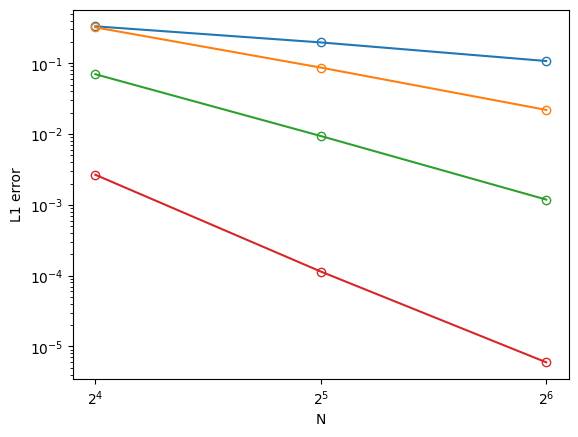

In [4]:
# plot l1 error over N for each p

fig, ax = plt.subplots()
for p in range(5):
    df_p = df[df["p"] == p]
    ax.plot(df_p["N"], df_p["l1"], marker="o", mfc="none", label=f"p={p}")

ax.set_xlabel("N")
ax.set_ylabel("L1 error")
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)